# Lending Club Case Study:

# Group Details:
# Author :: 
# 1.  Prachi Jain
# 2. Sachin Kumar
# Date :: 13/09/2019


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Inserting line magic functions to avoid plt.show()
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Reading csv File since getting low_memory warning for mixed data type therefore adding low_memory as false to avoid warning
loan_data=pd.read_csv("C:/Users/sachin.kumar/Desktop/python/lending case study/loan.csv",low_memory=False)
loan_data.shape # Rows=39717 Cols=111
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Business Objectives:
Lending Club company is largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.

Identification of such applicants using EDA is the aim of this case study.

## Detailed Information on the columns

In [2]:
loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

## Data Cleaning :

In [3]:
#Removing the cols with all values as NaN
loan_data.dropna(how='all', inplace=True, axis='columns')
loan_data.shape # Rows=39717 Cols=57

(39717, 57)

In [4]:
# 'pymnt_plan' has only one value i.e 'n'
loan_data['pymnt_plan'].unique()

array(['n'], dtype=object)

In [5]:
#We can remove 'pymnt_plan' 
loan_data.drop(columns=['pymnt_plan'], inplace=True)
loan_data.shape

(39717, 56)

In [6]:
#'URL','Description', 'zip_code' is not required for EDA
loan_data.drop(columns=['url','desc','zip_code'], inplace=True)
loan_data.shape

(39717, 53)

In [7]:
#'initial_list_status' has only one value so we can drop it.
loan_data['initial_list_status'].unique()

array(['f'], dtype=object)

In [8]:
loan_data.drop(columns=['initial_list_status'], inplace=True)
loan_data.shape

(39717, 52)

In [9]:
#'application_type' has only one value and will not contribute to the model,so we can drop it.
loan_data['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [10]:
#'policy_code' has only one value so we can drop it.
loan_data['policy_code'].unique()

array([1], dtype=int64)

In [11]:
#'collections_12_mths_ex_med' has only two values zero or NAN so we can drop it.
loan_data['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [12]:
#'next_pymnt_d' we can drop it.
loan_data['next_pymnt_d'].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [13]:
#'acc_now_delinq' has only value zero so we can drop it.
loan_data['acc_now_delinq'].unique()

array([0], dtype=int64)

In [14]:
#'chargeoff_within_12_mths' has only two values zero or NAN so we can drop it.
loan_data['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [15]:
#'delinq_amnt' has only value zero so we can drop it.
loan_data['delinq_amnt'].unique()

array([0], dtype=int64)

In [16]:
#'pub_rec_bankruptcies' Has only either 0 or 1 or 2 or NaN. It will not contribute to the model, so we can drop it
loan_data['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [17]:
loan_data.drop(columns=['application_type','pub_rec_bankruptcies','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','next_pymnt_d','collections_12_mths_ex_med','policy_code','application_type'], inplace=True)
loan_data.shape

(39717, 44)

In [18]:
# Dropping cols not available at the time of loan appl
loan_data.drop(['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
        'last_credit_pull_d',"delinq_2yrs","issue_d"], axis=1, inplace=True) 
loan_data.shape # Rows=39717 Cols=32

(39717, 30)

In [19]:
# Replace the percent sign and change the int_rate type to float64
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%','') 
loan_data['int_rate'] = loan_data['int_rate'].astype('float64') 
loan_data['int_rate'].unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

In [20]:
# col revol_util - convert to numeric - the amount of credit the borrower is using relative to all available revolving credit
loan_data.revol_util = loan_data.revol_util.str.replace("%","")
loan_data['revol_util'] = loan_data['revol_util'].apply(pd.to_numeric)
loan_data['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [21]:
total_Records = loan_data.isnull().sum().sort_values(ascending=False)
percent_Records = (loan_data.isnull().sum()/loan_data.count()).sort_values(ascending=False)
missing_data = pd.concat([total_Records, percent_Records], axis=1, keys=['Total', 'Percent'])
missing_data.head(22)

,Total,Percent
mths_since_last_record,36931,13.255922
mths_since_last_delinq,25682,1.829854
emp_title,2459,0.065999
emp_length,1075,0.027819
revol_util,50,0.001260
tax_liens,39,0.000983
title,11,0.000277
funded_amnt,0,0.000000
loan_amnt,0,0.000000
home_ownership,0,0.000000


In [22]:
# Delete the Columns which have most null values as shown above.
loan_data.drop(columns=['mths_since_last_record', 'mths_since_last_delinq', 'emp_title'], inplace=True)
loan_data.shape

(39717, 27)

In [23]:
#Remove Id & member Id since it is of no use
loan_data.drop(columns=['id', 'member_id'], inplace=True)
loan_data.shape

(39717, 25)

In [24]:
#'loan_status' has Three types of record which willbe very useful for EDA.
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [25]:
#'term' has only 2 values & will be very important for EDA
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [26]:
#Replace the both values with 36 & 60 respectively
term={' 36 months':36,' 60 months':60}
loan_data['term'].replace(term,inplace=True)
loan_data['term'].head(10)

0    36
1    60
2    36
3    36
4    60
5    36
6    60
7    36
8    60
9    60
Name: term, dtype: int64

In [27]:
#'grade' has only 7 values & will be very important for EDA
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [28]:
#'sub_grade' has multiple values & will be very important for EDA
loan_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [29]:
#'home_ownership' has only 5 values & will be very important for EDA
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [30]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'tax_liens'],
      dtype='object')

In [31]:
#'tax_liens' has only two values zero or NAN so we can drop it.
loan_data['tax_liens'].unique()

array([ 0., nan])

In [32]:
#Remove Id & member Id since it is of no use
loan_data.drop(columns=['tax_liens'], inplace=True)
loan_data.shape

(39717, 24)

In [33]:
#Show all columns for EDA
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [34]:
#CHeck the total null values in 'emp_length' column
loan_data['emp_length'].isnull().sum()

1075

In [35]:
employee_len={'n/a':-1,'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10 years':10, '10+ years':11}
loan_data['emp_length'].replace(employee_len,inplace=True)
loan_data['emp_length'].unique()

array([11.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [36]:
#Replace NAN with 0
loan_data['emp_length']=loan_data['emp_length'].replace(np.nan,0)
loan_data['emp_length'].unique()

array([11.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [37]:
# COL=earliest_cr_line, it is the month from which borrower's earliest reported credit line was opened
# selecting age of borrower till 2012
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x : pd.to_datetime(x, format="%b-%y"))
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].dt.year
loan_data['earliest_cr_line'] = loan_data.earliest_cr_line.replace("NaN", 0)
loan_data['earliest_cr_line'].head()

0    1985
1    1999
2    2001
3    1996
4    1996
Name: earliest_cr_line, dtype: int64

In [38]:
# Since purpose and title columns have same values but purpose is refined one, we will be using purpose therefore dropping title.
loan_data.drop(columns=['title'], inplace=True)

In [39]:
export_csv = loan_data.to_csv (r'C:/Users/sachin.kumar/Desktop/python/lending case study/export_loanData4.csv', header=True) 

In [40]:
#Created new column for Defaulted Customers based on the attribute value 'Chareged Off'
loan_data['defaulted_customers'] = loan_data['loan_status'].apply(lambda x:1 if x == 'Charged Off' else 0)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,defaulted_customers
0,5000,5000,4975.0,36,10.65,162.87,B,B2,11.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,1985,1,3,0,13648,83.7,9,0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,1999,5,3,0,1687,9.4,4,1
2,2400,2400,2400.0,36,15.96,84.33,C,C5,11.0,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2001,2,2,0,2956,98.5,10,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,11.0,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,1996,1,10,0,5598,21.0,37,0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Current,other,OR,17.94,1996,0,15,0,27783,53.9,38,0


In [41]:
# Dropping loan_status since we already have defaulted_customers count
loan_data.drop(columns=['loan_status'], inplace=True)

In [42]:
total_Record = loan_data.isnull().sum().sort_values(ascending=False)
percent_Record = (loan_data.isnull().sum()/loan_data.count()).sort_values(ascending=False)
missing_data = pd.concat([total_Record, percent_Record], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)
#In the below output data frame we can see there is no Null value exist.

,Total,Percent
revol_util,50,0.00126
defaulted_customers,0,0.00000
annual_inc,0,0.00000
funded_amnt,0,0.00000
funded_amnt_inv,0,0.00000
term,0,0.00000
int_rate,0,0.00000
installment,0,0.00000
grade,0,0.00000
sub_grade,0,0.00000


In [43]:
loan_data.shape # Rows= 39717 , cols= 23

(39717, 23)

## Univariate Analysis:

Unordered categorical Analysis

In [44]:
# Checking the count of defaulters wrt home_ownership
loan_data.groupby(["home_ownership"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
# So the applicants living on rent or have mortgaged their house have a tendency to default.

,defaulted_customers
home_ownership,
RENT,2839
MORTGAGE,2327
OWN,443
OTHER,18
NONE,0


In [45]:
# Checking the count of defaulters wrt verification_status
loan_data.groupby(["verification_status"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
# So the applicants whose income is not verified by LC have a tendency to default more but then there are defaults which have been verified by LC.

,defaulted_customers
verification_status,
Not Verified,2142
Verified,2051
Source Verified,1434


In [46]:
# Checking the count of defaulters wrt addr_state
g=loan_data.groupby(["addr_state"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
g
# So the Top 5 states where the applicants are defaulting more than other states - California, New York, Florida, Texas, New Jersey.

,defaulted_customers
addr_state,
CA,1125
FL,504
NY,495
TX,316
NJ,278
GA,215
IL,197
PA,180
VA,177


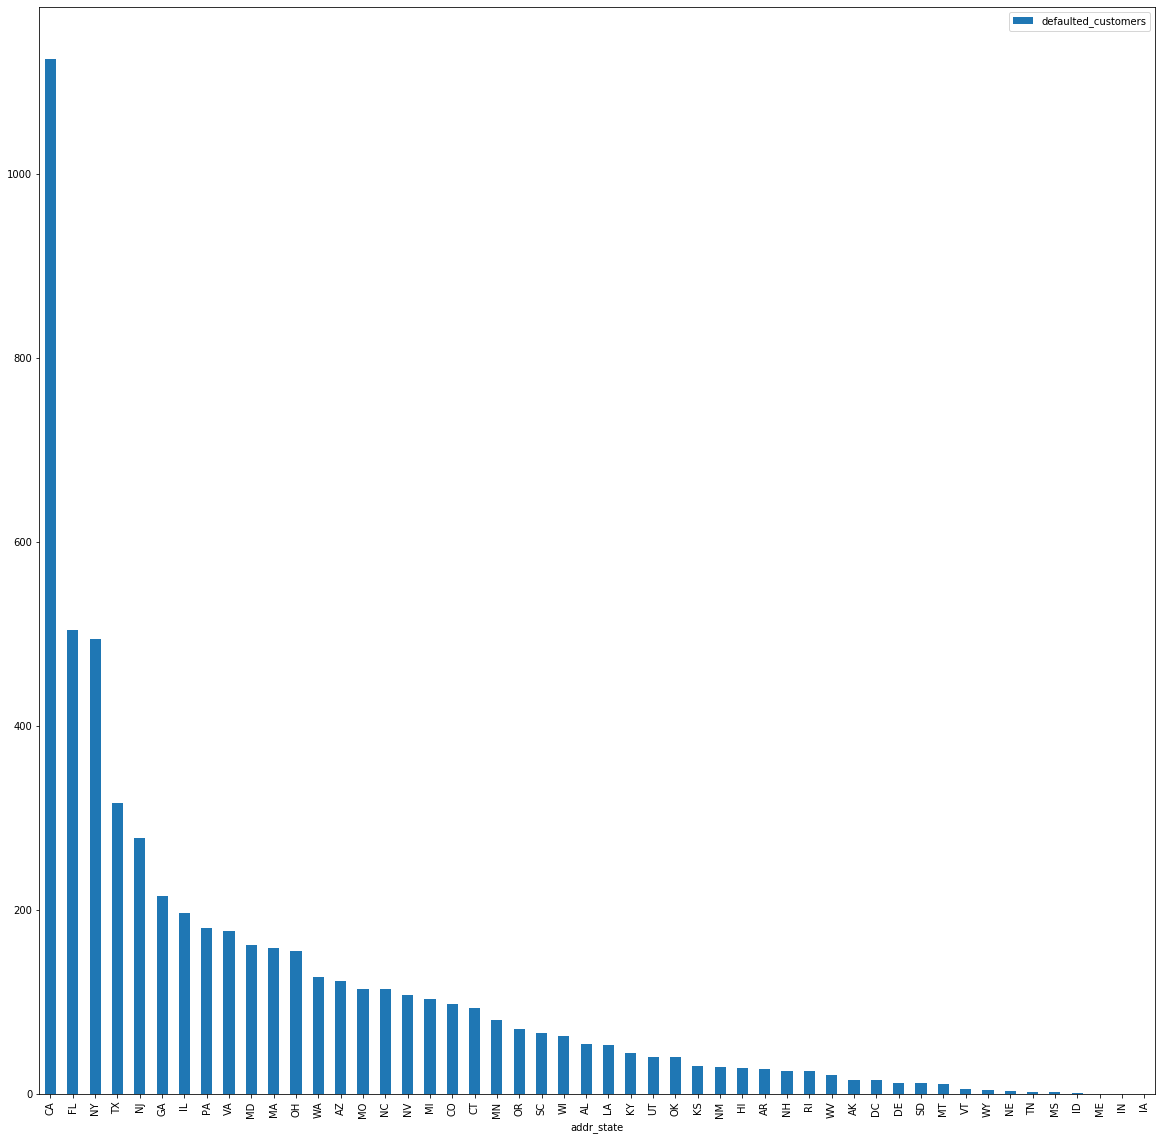

In [47]:
# Plot for defaulters spread across states
g.plot(kind="bar",figsize=(20,20))

In [48]:
# Checking the count of defaulters wrt purpose
g=loan_data.groupby(["purpose"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
g
# So the applicants with debt consideration are more likely to dafault.

,defaulted_customers
purpose,
debt_consolidation,2767
other,633
credit_card,542
small_business,475
home_improvement,347
major_purchase,222
car,160
medical,106
wedding,96


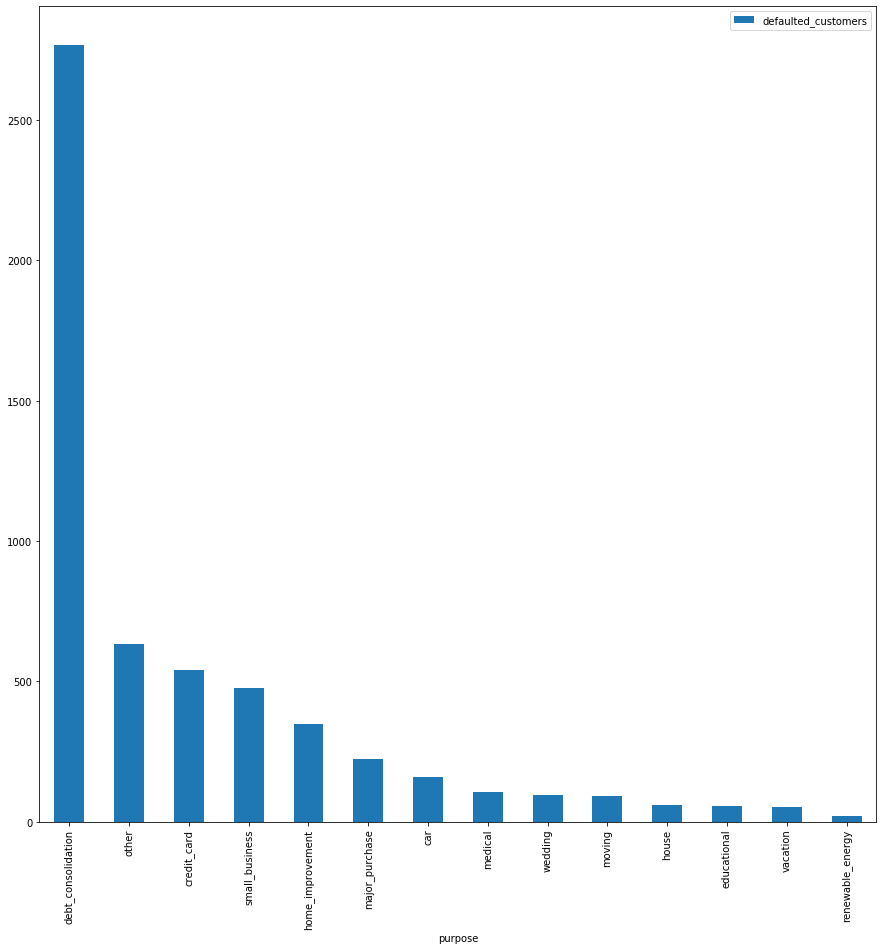

In [49]:
# Plot for defaulters spread across purpose
g.plot(kind="bar",figsize=(15,15))

Ordered Univariate Analysis

In [50]:
# Checking the count of defaulters wrt grade
g=loan_data.groupby(["grade"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
g
# Applicatants belonging to grade B, C and D are defaulting more than others.

,defaulted_customers
grade,
B,1425
C,1347
D,1118
E,715
A,602
F,319
G,101


In [51]:
# Checking the grade and subgrade as assigned by LC for the applicants who are defaulting.
p=pd.pivot_table(loan_data, index=["grade","sub_grade"],values="defaulted_customers", aggfunc = sum).sort_values(by="defaulted_customers",ascending=False)
p

defaulted_customers
grade sub_grade                     
B     B5                         356
      B3                         341
C     C1                         336
B     B4                         329
C     C2                         321
D     D2                         271
C     C3                         270
D     D3                         256
B     B2                         228
A     A5                         217
D     D4                         215
C     C4                         212
D     D5                         209
C     C5                         208
E     E1                         198
A     A4                         178
B     B1                         171
D     D1                         167
E     E2                         163
      E4                         126
      E3                         119
      E5                         109
A     A3                         103
F     F1                          91
A     A2                          74
F     F2                          70
      F5                          54
      F4                          53
      F3                          51
G     G1                          31
A     A1                          30
G     G2                          28
      G3                          19
      G4                          13
      G5                          10

In [52]:
# Checking the count of defaulters wrt term
g=loan_data.groupby(["term"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
g
# Applicants taking loan for 3 years are defaulting more than who are taking loan for 5 years.

,defaulted_customers
term,
36,3227
60,2400


In [53]:
# Checking the count of defaulters wrt emp_length
g=loan_data.groupby(["emp_length"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
g
# Applicants with more than 10 years of employment and the one with less than 1 year of employment are tending to default.

,defaulted_customers
emp_length,
11.0,1331
0.0,867
2.0,567
3.0,555
4.0,462
5.0,458
1.0,456
6.0,307
7.0,263


In [54]:
# Checking the count of defaulters wrt pub_rec (Number of derogatory public records)
g=loan_data.groupby(["pub_rec"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
g
# Applicants with no derogatory public records are riskier borrowers.

,defaulted_customers
pub_rec,
0,5160
1,457
2,10
3,0
4,0


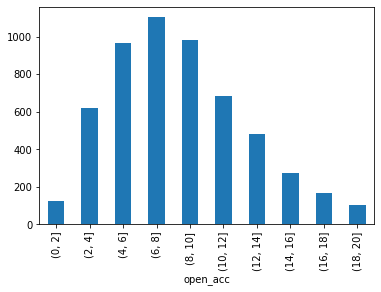

In [55]:
# Checking the count of defaulters wrt open_acc (The number of open credit lines in the borrower's credit file.)
bins = [0,2,4,6,8,10,12,14,16,18,20]
df = loan_data.groupby(pd.cut(loan_data['open_acc'], bins=bins)).defaulted_customers.sum()
df.plot(kind='bar')

# Applicants with open credit lines between 6-8 accounts are defaulting loans.

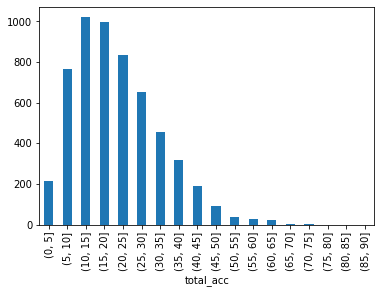

In [56]:
# Checking the count of defaulters wrt total_acc (The total number of credit lines currently in the borrower's credit file)
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
df = loan_data.groupby(pd.cut(loan_data['total_acc'], bins=bins)).defaulted_customers.sum()
df.plot(kind='bar')

# Applicants with total credit lines between 10-20 accounts are defaulting loans.

In [57]:
# Checking the count of defaulters wrt inq_last_6mths (inquiries in last 6 months)
g=loan_data.groupby(["inq_last_6mths"]).agg({"defaulted_customers":"sum"}).sort_values(by="defaulted_customers",ascending=False)
g
# Applicants with no inquiries are riskier borrowers than others.
# If someone is out shopping for credit in several places and then they come to Lending Club or Prosper looking for a loan then they are a higher risk borrower. They may have some serious financial problems if they are shopping for a lot of credit. But if someone is looking for a loan and comes to LC first then they are a better credit risk.

,defaulted_customers
inq_last_6mths,
0,2280
1,1677
2,943
3,619
4,51
5,28
6,16
7,10
8,3


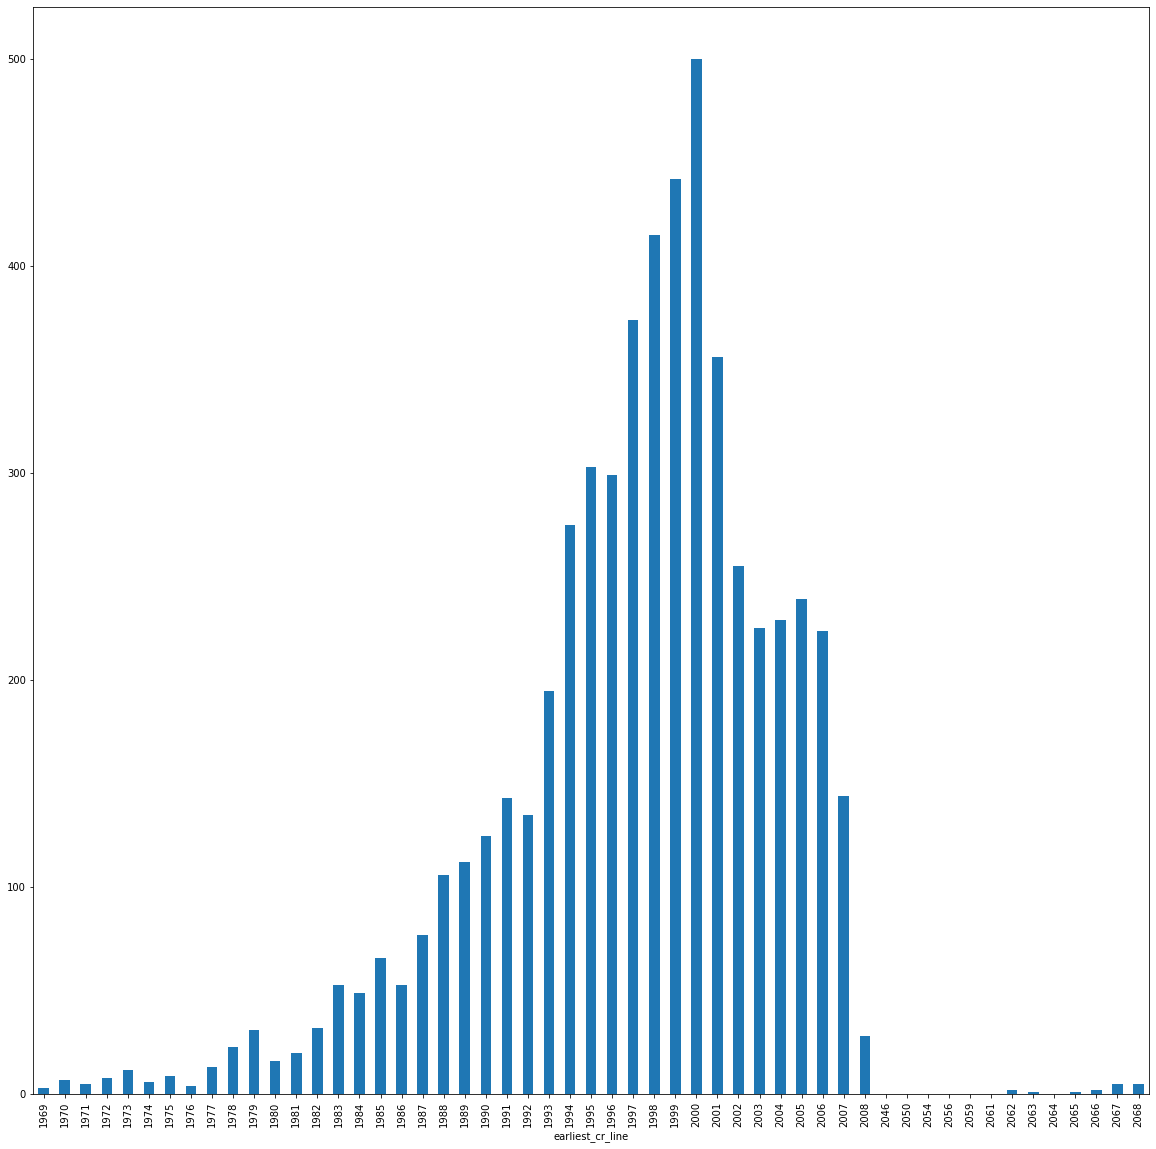

In [58]:
# Checking the count of defaulters wrt earliest_cr_line (The duration in number of days from which the borrower's earliest reported credit line was opened)
bins=10
df = loan_data.groupby(['earliest_cr_line']).defaulted_customers.sum()
df.plot(kind='bar',figsize=(20,20))

# The borrowes who have started their credit line in the year 2000, i.e, 11 years from 2011 are risky borrowers.

# Segmented Univariate Analysis

In [59]:
# Checking correlation between loan_amt, funded_amt and funded_amt_inv
corrmatrix = loan_data[["loan_amnt","funded_amnt","funded_amnt_inv"]].corr().abs() 
corrmatrix
#Since these 3 attributes are highly correlated so we will consider only loan_amnt in our analysis.

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981578,0.940034
funded_amnt,0.981578,1.000000,0.958422
funded_amnt_inv,0.940034,0.958422,1.000000


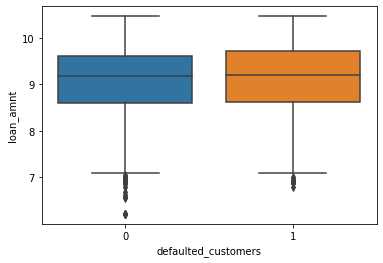

In [60]:
# Checking spread and the boxplot for loan_amnt
loan_data["loan_amnt"].describe()
sns.boxplot(data=loan_data, y=np.log(loan_data["loan_amnt"]), x="defaulted_customers")
# The median is same but the boxplot for the defaulters is wider when loan_amnt is compared
# The applicants which are applying for more loan_amnt are risky borrowers.

In [79]:
# Checking the defaulters wrt annual_income
#loan_data["annual_inc"].describe()
g=loan_data.groupby(["defaulted_customers"])
g.get_group(1)["annual_inc"].describe()
# The standard deviation is high and the spread of income amnts is quite high.

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

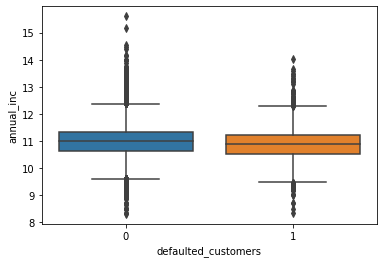

In [62]:
# Checking the boxplots
sns.boxplot(data=loan_data, y=np.log(loan_data['annual_inc']), x="defaulted_customers")
# The median of income for the risky borrowers is less than the other category with high number of outliers therefore this could not be considered in the analysis.

In [76]:
# Checking the DTI ratio for the defaulters.
g=loan_data.groupby(["defaulted_customers"])
g.get_group(1)["dti"].describe()
# The spread of values is even

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

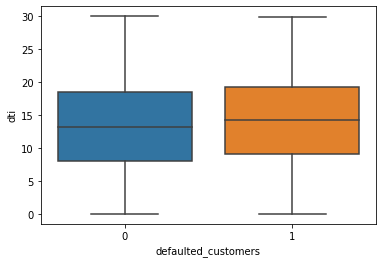

In [64]:
# Checking boxplot
sns.boxplot(data=loan_data, y="dti", x="defaulted_customers")
# The applicants whose debt to income ratio is more are risky borrowes.

In [65]:
# Checking Total credit revolving balance
loan_data["revol_bal"].describe()
#The standard deviation is very high with huge difference in min and max therefore will not consider this attribute.

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

,revol_util
defaulted_customers,
1,55.57211
0,47.72169


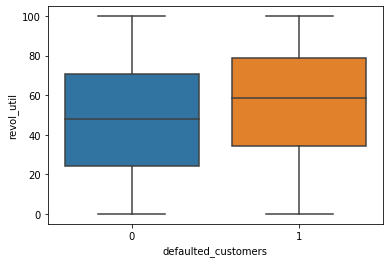

In [66]:
# Checking Total credit revolving util (the amount of credit the borrower is using relative to all available revolving credit.)
loan_data["revol_util"].describe()
# Checking boxplot
sns.boxplot(data=loan_data, y='revol_util', x="defaulted_customers")

g=loan_data.groupby(["defaulted_customers"]).agg({"revol_util":"mean"}).sort_values(by="revol_util",ascending=False)
g
# Risky borrowers have high revol_util values with mean as 55.57

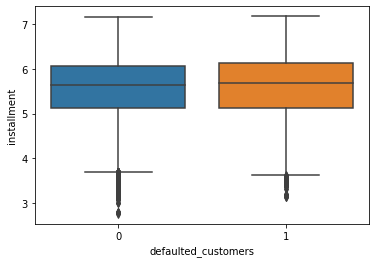

In [67]:
# Checking the impact of installment amount on defaulters
loan_data["installment"].describe()
sns.boxplot(data=loan_data, y=np.log(loan_data['installment']), x="defaulted_customers")
# The median is same so it does have much impact.

,int_rate
defaulted_customers,
1,13.820432
0,11.724186


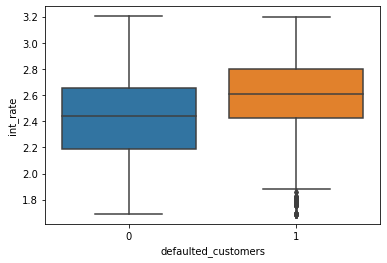

In [68]:
# Checking the impact of int_rate amount on defaulters
sns.boxplot(data=loan_data, y=np.log(loan_data['int_rate']), x="defaulted_customers")
# The risky borrowers have high interest rate.

g=loan_data.groupby(["defaulted_customers"]).agg({"int_rate":"mean"}).sort_values(by="int_rate",ascending=False)
g

# Bivariate Analysis

In [69]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'defaulted_customers'],
      dtype='object')

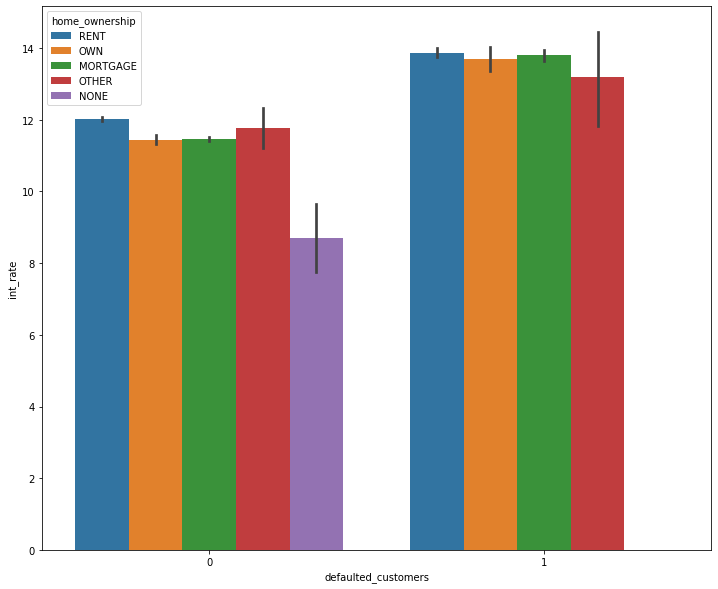

In [70]:
plt.figure(figsize=(12,10))
sns.barplot(y='int_rate', x='defaulted_customers', hue="home_ownership", data=loan_data, estimator=np.mean)

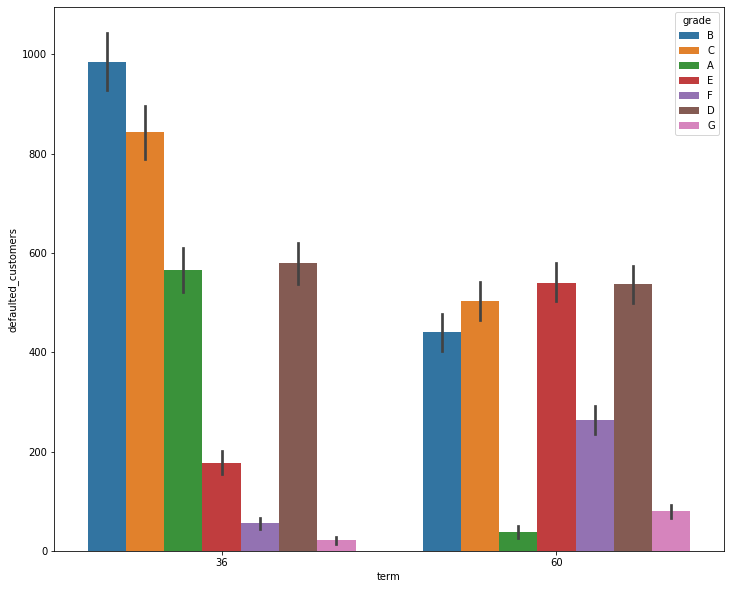

In [71]:
plt.figure(figsize=(12,10))
sns.barplot(y='defaulted_customers', x='term', hue="grade", data=loan_data, estimator=np.sum)

In [72]:
loan_data.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                     int64
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
addr_state              object
dti                    float64
earliest_cr_line         int64
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util             float64
total_acc                int64
defaulted_customers      int64
dtype: object

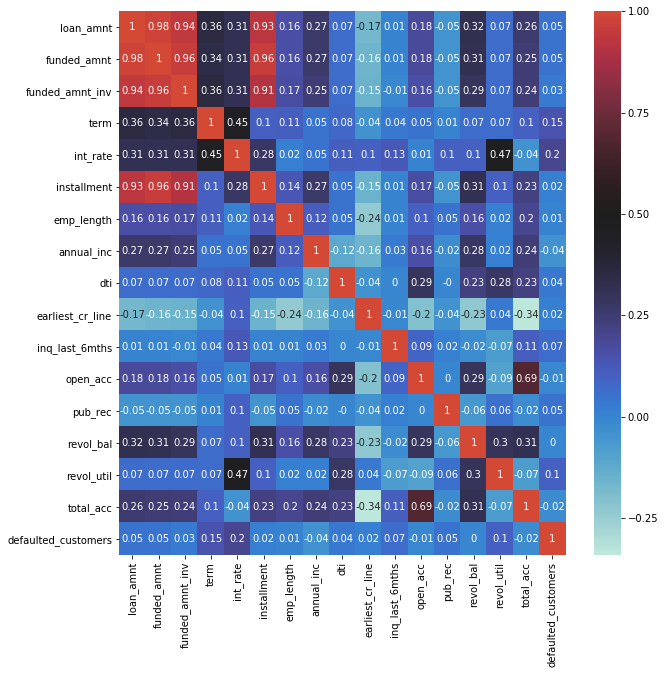

In [73]:
 plt.figure(figsize=(10,10))
cont_var= ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti','earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal','revol_util',
       'total_acc',
       'defaulted_customers']
corr = round(loan_data[cont_var].corr(),2)
sns.heatmap(corr, annot=True,center=0.5)

In [74]:
# Checking the correlation between attributes which have an impact over default borrowers.
corrmatrix = round(loan_data[cont_var].corr(),2)
corrmatrix = corrmatrix.stack()
# corrmatrix[(corrmatrix >= 0.5) & (corrmatrix != 1.0)].sort_values(ascending=True)
corrmatrix

loan_amnt            loan_amnt              1.00
                     funded_amnt            0.98
                     funded_amnt_inv        0.94
                     term                   0.36
                     int_rate               0.31
                     installment            0.93
                     emp_length             0.16
                     annual_inc             0.27
                     dti                    0.07
                     earliest_cr_line      -0.17
                     inq_last_6mths         0.01
                     open_acc               0.18
                     pub_rec               -0.05
                     revol_bal              0.32
                     revol_util             0.07
                     total_acc              0.26
                     defaulted_customers    0.05
funded_amnt          loan_amnt              0.98
                     funded_amnt            1.00
                     funded_amnt_inv        0.96
                    

# As seen from above correlation heatmap we observed below:
1. Negative Correlation : When any one value among (annual_income & open_acc & total_acc) increase the defaulted_customers decrease.
2. Since there is no correlation with revol_bal, it has no impact.
3. Rest attributes loan_amnt,funded_amt,funded_amnt_inv,term,int_rat,installment,emp_length,dti,earliest_cr_line,inq_last_6mths,pub_rec,revol_util has positive impact on defaulted_customers.